rankflasso: starting iterations

rankflasso: starting iterations



(-18.950000000000003, 419.95, -0.15000000000000002, 3.15)

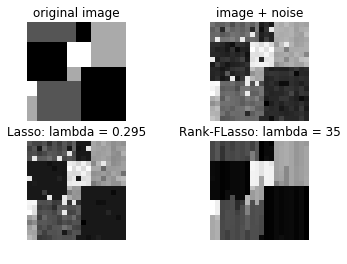

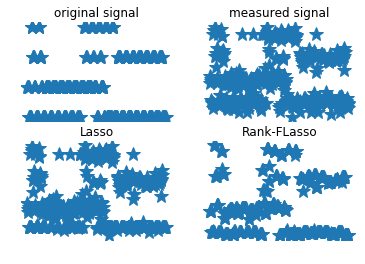

In [2]:
import robustsp as rsp
import numpy as np
import matplotlib
# %matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
import pkg_resources

# Read image of sqares (20 x 20 pixels)
path = pkg_resources.resource_filename('robustsp', 'data/images.mat') 
# contains the vectors y20 (clean data) and y20n (noisy data)
img = scipy.io.loadmat(path,struct_as_record=False)
y20 = img['y20']
y20n = img['y20n']
n = len(y20)
scaledata1 = lambda x: 3*(x-np.min(x)) / (np.max(x) - np.min(x))
scaledata2 = lambda x: 3*(x-np.min(x,axis=1)[:,None]) / (np.max(x,axis=1) - np.min(x,axis=1))[:,None]

# Plot the image
fig0 = plt.figure(0)

plt.subplot(2,2,1)
plt.imshow(np.reshape(y20,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),
              interpolation='none', cmap=plt.cm.gray)
plt.title('original image')
plt.axis('off')

# Plot the image + noise
plt.subplot(2,2,2)
plt.imshow(np.reshape(y20n,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),
              interpolation='none', cmap=plt.cm.gray)
plt.title('image + noise')
plt.axis('off')

# Plot the signal
fig1 = plt.figure(1)
plt.subplot(2,2,1)
plt.plot(range(1,n+1), y20,'*',ms=14)
plt.title('original signal')
plt.axis('off')

# Plot the noisy (measured) signal
plt.subplot(2,2,2)
plt.plot(range(1,n+1), scaledata1(y20n),'*',ms=14)
plt.title('measured signal')
plt.axis('off')
# --- Compute the LASSO solution ---

L = 20 # Grid size
Blas20n, stats = rsp.enetpath(y20n, np.eye(n), 1, L,10**-3,False)
Blas20n = Blas20n[:,1:] # Get rid of the all-zeros first column 

# Choose the best LASSO solution
ero = scaledata2(Blas20n.T).T - y20
MSElasso = np.min(np.sum(ero**2,axis=0))
indx = np.argmin(np.sum(ero**2,axis=0)) # should b 6
Blas = Blas20n[:,indx] # the best lasso solution
lam_las = stats['Lambda'][indx+1] # the best lambda value


plt.figure(0)
plt.subplot(2,2,3)
plt.imshow(np.reshape(Blas, (20, 20), order="F"),
              interpolation='none', cmap=plt.cm.gray)
plt.title('Lasso: lambda = %.3f' % lam_las)
plt.axis('off')

plt.figure(1)
plt.subplot(2,2,3)
plt.plot(range(1,n+1), scaledata1(Blas),'*',ms=14)
plt.title('Lasso')
plt.axis('off')
# --- Compute the Rank-FLasso solution ---

# start with some initial values of lambda1 and lambda2
lambda2 = 340
lambda1 = 124

B1 = rsp.rankflasso(y20n,np.eye(n),lambda1,lambda2,Blas,1)[0]
MSE_rank1 = np.sum((scaledata1(B1)-y20n)**2)

# adjust the parameters
lambda2 = 420
lambda1 = 35

B2 = rsp.rankflasso(y20n.flatten(), np.eye(400),lambda1,lambda2,B1,1)[0]
MSE_rank2 = np.sum((scaledata1(B2)-y20n)**2)

plt.figure(0)
plt.subplot(2,2,4)
plt.imshow(np.reshape(B2, (20, 20), order="F"),
              interpolation='none', cmap=plt.cm.gray)
plt.title('Rank-FLasso: lambda = %i' % lambda1)
plt.axis('off')

plt.figure(1)
plt.subplot(2,2,4)
plt.plot(range(1,n+1), scaledata1(B2),'*',ms=14)
plt.title('Rank-FLasso')
plt.axis('off')

In [11]:
np.sum(B2)

123.39952853500509

In [12]:
import robustsp as rsp
import numpy as np
y = np.array([0,1.,2.24,345.55])
#rsp.rankflasso(y,np.eye(4),32,12)
M = np.hstack((np.ones((4,1)),np.eye(4)))
a = np.linalg.lstsq(np.hstack((np.ones((4,1)),np.eye(4))),[1,1.,2.24,345.55],rcond=None)[0]


array([ 69.958, -68.958, -68.958, -67.718, 275.592])

In [86]:
import robustsp as rsp
import numpy as np
import scipy.io
import pkg_resources

scaledata = lambda x: 3*(x-np.min(x,axis=1)[:,None]) / (np.max(x,axis=1) - np.min(x,axis=1))[:,None]

# Read image of sqares (20 x 20 pixels)
path = pkg_resources.resource_filename('robustsp', 'data/images.mat') 
# contains the vectors y20 (clean data) and y20n (noisy data)
img = scipy.io.loadmat(path,struct_as_record=False)
y20 = img['y20']
y20n = img['y20n']

# Compute the LASSO solution
L = 20 # Grid size
Blas20n, stats = rsp.enetpath(y20n, np.eye(n), 1, L,10**-3,False)
Blas20n = Blas20n[:,1:] # Get rid of the all-zeros first column 

# Choose the best LASSO solution
ero = scaledata(Blas20n.T).T - y20
MSElasso = np.min(np.sum(ero**2,axis=0))
indx = np.argmin(np.sum(ero**2,axis=0)) # should b 6
Blas = Blas20n[:,indx] # the best lasso solution
lam_las = stats['Lambda'][indx] # the best lambda value
MSElasso

83.5976778374331

In [60]:
scaledata = lambda x: 3*(x-np.min(x,axis=1)[:,None]) / (np.max(x,axis=1) - np.min(x,axis=1))[:,None]
s = scaledata(np.array([[1,2,3],[4,5,6],[7,8,9]]))
s.T

array([[0. , 0. , 0. ],
       [1.5, 1.5, 1.5],
       [3. , 3. , 3. ]])

In [30]:
np.zeros((3,3))-np.ones(3)[:,None]

array([[-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.]])

In [19]:
'''
n =

   400


MSElasso =

   83.5977

rankflasso: starting iterations

MSE_rank1 =

  105.8938

rankflasso: starting iterations

MSE_rank2 =

   21.8556
'''

True

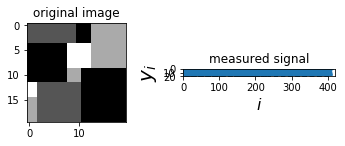

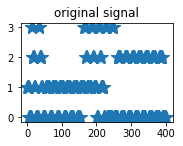

In [19]:
# Plot the image
fig1 = plt.figure(0)
ax0 = fig1.add_subplot(2,2,1)
#plt.subplot(221)
fig1.add_subplot(2,2,1)
ax0.set_title('original image')
#plt.title('original image')
ax0.imshow(np.reshape(y20,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),
              interpolation='none', cmap=plt.cm.gray)
#plt.imshow(np.reshape(y20,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),
#              interpolation='none', cmap=plt.cm.gray)
fig1.show()

# Plot the signal
fig2 = plt.figure(1)
#ax02 = plt.subplot(2,2,1) # ,aspect='equal'
plt.subplot(2,2,1)
#plt.axis('tight')
#plt.autoscale(axis='both')
#ax02.set_title('original signal')
plt.title('original signal')
#ax02.plot(range(1,n+1),y20,'*',markersize=14)
plt.plot(range(1,n+1),y20,'*',markersize=14)

# Plot the image + noise
plt.figure(0)
#ax2 = plt.subplot(2,2,2)

#ax2.set_title('image + noise')
#ax2.imshow(np.reshape(y20n,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),interpolation='none', cmap=plt.cm.gray)
fig1.add_subplot(2,2,2)
plt.imshow(np.reshape(y20n,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),interpolation='none', cmap=plt.cm.gray)
fig1.show()

# Plot the noisy (measured) signal
fig2
ax12 = plt.subplot(2,2,2) # ,aspect='equal'
ax12.set_title('measured signal')
ax12.set_xlabel(r"$i$",fontsize=16)
ax12.set_ylabel(r"$y_{i}$",fontsize=20)
ax12.plot(range(1,n+1),y20n,'*',markersize=14)


# Compute the Lasso solution
L = 20 # grid size
Blas20n, stats = rsp.enetpath(y20n,np.eye(n),1,L,1e-3,False)

Blas20n = Blas20n[:,1:] # get rid of all zeros
# Choose the best Lasso solution
ero = scaledata(Blas20n - y20)
MSElasso = np.min(np.sum(ero**2,axis=1))
indx = np.nanargmin(np.sum(ero**2,axis=0))

Blas20nMat = scipy.io.loadmat('Blas20n.mat',struct_as_record=False)['Blas20n']
np.array_equal(np.around(Blas20n,4),Blas20nMat) # False
np.isclose(np.around(Blas20n,4),Blas20nMat).all() # False
np.isclose(np.around(Blas20n,4),np.around(Blas20nMat,4)).all() # True
np.array_equal(np.around(Blas20n,4),np.around(Blas20nMat,4)) # True

In [ ]:
n = np.zeros((3,3))
y = np.ones(3)


In [ ]:
lam0 = np.max(np.abs(np.eye(n).T @ y20n))
lamgrid = 1e-3 ** (np.arange(L+1)/L)*lam0
rsp.enet(y20n, np.eye(n), np.zeros(21), lamgrid[0])

In [ ]:
X = np.array([(1,2,3),(4,5,6),(7,8,9)])
np.array([1,2,3]) + X[:,1].T @ np.array([6,7,8])

In [4]:
# Read image of sqares (20 x 20 pixels)
path = pkg_resources.resource_filename('robustsp', 'data/images.mat')
# contains the vectors y20 (clean data) and y20n (noisy data)
img = scipy.io.loadmat(path,struct_as_record=False)
y20 = img['y20']
y20n = img['y20n']
n = len(y20)
# Compute the Lasso solution
L = 20 # grid size
Blas20n, stats = rsp.enetpath(y20n,np.eye(n),1,L,1e-3,False)
Blas20n[:,-1]

array([ 1.15444902e+00,  8.35459355e-01,  9.53596658e-01,  1.00499670e+00,
        9.02064205e-02,  2.45434521e-02, -1.23986948e-02,  2.99668893e+00,
       -2.30837894e-01, -1.93926720e-02, -5.15012993e-02, -8.02150303e-02,
        3.17160325e+00,  3.11167167e+00,  3.29062722e+00,  2.01996891e+00,
        1.57290337e+00,  2.03564506e+00,  2.14577386e+00,  2.37199998e+00,
        8.71230792e-01,  1.08317907e+00,  1.00551903e+00,  2.99668893e+00,
        8.78621298e-02, -1.18630726e-01, -1.69006185e-02, -1.53700647e-01,
        3.40319606e-01, -5.60895851e-02,  0.00000000e+00,  1.09418010e-01,
        3.21077619e+00,  2.90527309e+00,  2.88746698e+00,  2.25963894e+00,
        1.80745895e+00,  2.27330493e+00,  2.08230275e+00,  2.16833816e+00,
        8.63756797e-01,  0.00000000e+00,  7.53904238e-01,  1.17103208e+00,
        2.16370032e-02, -7.23896964e-02, -4.78144808e-02,  1.84849719e-01,
       -4.89781328e-02, -2.49823037e-01, -1.35419654e-01, -2.92204768e-01,
        1.02353289e+00,  

In [ ]:
"""
ans
 0.0

 lam1 
 2.344054971563103
"""
import robustsp as rsp
rsp.SoftThresh(0,2.344054971563103)